In [211]:
import numpy as np
import sympy as sy
from IPython.display import display
import itertools
from matplotlib import pyplot as plt

In [84]:
interaction_rules = np.array([
                            # Chain motif
                            [[-1, -1, 0], [1, 0, -1], [0, 1, 0]]
                            ])
dispersal_rules = np.array([
                            # Only top predator disperses in response to self density
                            [[0, 0, 0], [0, 0, 0], [0, 0, 1]],
                            # Top & middle predators disperse in response to self density
                            [[0, 0, 0], [0, 1, 0], [0, 0, 1]]
                            ])

In [85]:
# Local Jacobian and connectivity matricies
J11, J12, J13, J21, J22, J23, J31, J32, J33 = sy.symbols('J11, J12, J13, J21, J22, J23, J31, J32, J33')
J = sy.Matrix([[J11, J12, J13], 
               [J21, J22, J23], 
               [J31, J32, J33]])
C11, C12, C13, C21, C22, C23, C31, C32, C33 = sy.symbols('C11, C12, C13, C21, C22, C23, C31, C32, C33')
C = sy.Matrix([[C11, C12, C13], 
               [C21, C22, C23], 
               [C31, C32, C33]])

# Laplacian eigenvalue
kappa = sy.symbols('kappa')

In [86]:
for rule_i, rules in enumerate(itertools.product(interaction_rules, dispersal_rules)):
    print("Rule {} --------------------------------".format(rule_i+1))
    J_rule, C_rule = rules
    J_constraints = sy.Matrix(J_rule)
    J_constrained = J.multiply_elementwise(J_constraints)
    display(J_constrained)
    
    C_constraints = sy.Matrix(C_rule)
    C_constrained = C.multiply_elementwise(C_constraints)
    display(C_constrained)

    # Spatial metacommunity matrix including assumptions
    M = J_constrained + kappa * C_constrained
    display(M)
    
    # Characteristic polynomial
    lamda = sy.symbols('lamda')
    p = M.charpoly(lamda)
    p_coeffs = p.all_coeffs()
    display(p)
    
    # Oscillatory instability kappa roots
    I_wav = p_coeffs[3] - p_coeffs[1]*p_coeffs[2]
    display(I_wav)
    kappa_wav = sy.solve(I_wav, kappa, dict=True)
    for root in range(len(kappa_wav)):
        # display(kappa_wav[root][kappa])
        ...

    # Stationary instability kappa roots
    I_st = p_coeffs[3]
    kappa_st = sy.solve(I_st, kappa, dict=True)
    for root in range(len(kappa_st)):
        # display((kappa_st[root][kappa]))
        ...
    
    print('\n')

Rule 1 --------------------------------


Matrix([
[-J11, -J12,    0],
[ J21,    0, -J23],
[   0,  J32,    0]])

Matrix([
[0, 0,   0],
[0, 0,   0],
[0, 0, C33]])

Matrix([
[-J11, -J12,         0],
[ J21,    0,      -J23],
[   0,  J32, C33*kappa]])

PurePoly(lamda**3 + (-C33*kappa + J11)*lamda**2 + (-C33*J11*kappa + J12*J21 + J23*J32)*lamda - C33*J12*J21*kappa + J11*J23*J32, lamda, domain='ZZ[C33,J11,J12,J21,J23,J32,kappa]')

-C33*J12*J21*kappa + J11*J23*J32 - (-C33*kappa + J11)*(-C33*J11*kappa + J12*J21 + J23*J32)



Rule 2 --------------------------------


Matrix([
[-J11, -J12,    0],
[ J21,    0, -J23],
[   0,  J32,    0]])

Matrix([
[0,   0,   0],
[0, C22,   0],
[0,   0, C33]])

Matrix([
[-J11,      -J12,         0],
[ J21, C22*kappa,      -J23],
[   0,       J32, C33*kappa]])

PurePoly(lamda**3 + (-C22*kappa - C33*kappa + J11)*lamda**2 + (C22*C33*kappa**2 - C22*J11*kappa - C33*J11*kappa + J12*J21 + J23*J32)*lamda + C22*C33*J11*kappa**2 - C33*J12*J21*kappa + J11*J23*J32, lamda, domain='ZZ[C22,C33,J11,J12,J21,J23,J32,kappa]')

C22*C33*J11*kappa**2 - C33*J12*J21*kappa + J11*J23*J32 - (-C22*kappa - C33*kappa + J11)*(C22*C33*kappa**2 - C22*J11*kappa - C33*J11*kappa + J12*J21 + J23*J32)

### Fully specified model
Using ecological model example from Hata 2014

In [278]:
# Define sympy symbols
u, w, v = sy.symbols("u w v")
a_u, a_v, a_w, b_u, c_u, c_v, d_v, d_w = sy.symbols("a_u a_v a_w b_u c_u c_v d_v d_w")
mu, nu = sy.symbols("mu, nu")
D_u, D_v, D_w = sy.symbols("D_u D_v D_w")
kappa = sy.symbols('kappa')
lamda = sy.symbols('lamda')
C11, C12, C13, C21, C22, C23, C31, C32, C33 = sy.symbols('C11, C12, C13, C21, C22, C23, C31, C32, C33')

# Define nonlinear interaction terms
f = (a_u - b_u*u - c_u*(w/(u+mu))) * u
g = (a_v*(1 - c_v*(v/u)) - d_v*(w/(v+nu))) * v
h = (a_w * (1 - d_w*(w/v))) * w
# display(f, g, h)

# Define parameter values
param_vals = [(a_u,3), (a_v,6), (a_w,4), 
              (b_u,1), (c_u,1), (c_v,1), 
              (d_v,1), (d_w,0.25),
              (mu,0.25), (nu,0.25)]

# Solve for the uniform steady state
'''I get a different steady from the paper'''
eq_vec = (sy.Eq(f.subs(param_vals),0), 
          sy.Eq(g.subs(param_vals),0), 
          sy.Eq(h.subs(param_vals),0))
var_vec = (u, v, w)
x0 = (1, 2.5, 10.2)
u_0, v_0, w_0 = sy.nsolve(eq_vec, var_vec, x0)

# Construct M matrix
J = sy.Matrix([[sy.diff(f, u), sy.diff(f, v), sy.diff(f, w)],
               [sy.diff(g, u), sy.diff(g, v), sy.diff(g, w)],
               [sy.diff(h, u), sy.diff(h, v), sy.diff(h, w)]])
J_sub = J.subs(param_vals)
C = sy.Matrix([[0, 0, 0], 
               [0, C22, 0], 
               [0, 0, C33]])
M = J + kappa*C
M_sub = M.subs(param_vals + [(u, u_0), (v, v_0), (w, w_0)])

# Characteristic polynomial
p = M_sub.charpoly(lamda)
p_coeffs = p.all_coeffs()

# Oscillatory and stationary instability conditions
I_wav = p_coeffs[3] - p_coeffs[1]*p_coeffs[2]
I_st = p_coeffs[3]

# Generate instability surface
'''For now, assume 2D'''
C_k = []
M_sub_k = []
J_sub_k = []
for i in range(C.shape[0]):
    for j in range(C.shape[0]):
        if C[i,j] != 0:
            C_k.append(C[i,j])
            M_sub_k.append(M_sub[i,j])
            J_sub_k.append(J_sub[i,j].subs([(u, u_0), (v, v_0), (w, w_0)]))

In [279]:
# Search for kappa_c over 'directions' in spatially dependent sub-space of M
num_samples = 10
disp1 = np.linspace(-10,10, num_samples, endpoint=False)
disp2 = np.linspace(-10,10, num_samples, endpoint=False)
roots = {C_k[0]: [], C_k[1]: [], 'roots': []}
for C_x, C_y in itertools.product(disp1, disp2):
    roots[C_k[0]].append(C_x)
    roots[C_k[1]].append(C_y)
    roots_k = []
    for root in kappa_wav:
        sol = root.subs([(C_k[0], C_x), (C_k[1], C_y)])
        if sol.is_real and (sol > 0):
            roots_k.append(sol)
    roots['roots'].append(roots_k)

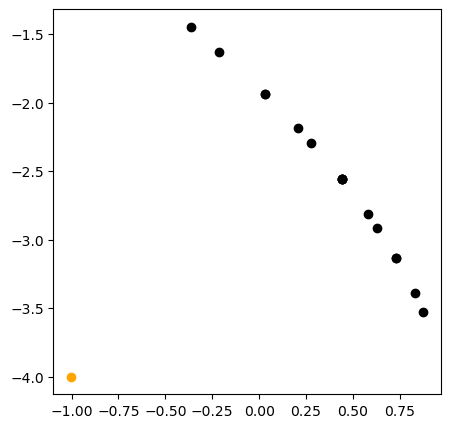

In [280]:
# Scatter plot each real, positive kappa_c in M sub-space
plt.figure(figsize=(5,5))
plt.scatter(J_sub_k[0], J_sub_k[1], c='orange')
for i in range(len(disp1)*len(disp2)):
    C_x = roots[C_k[0]][i]
    C_y = roots[C_k[1]][i]
    for root in roots['roots'][i]:
        param_vals = [(C_k[0], C_x), (C_k[1], C_y), (kappa, root)]
        x = M_sub_k[0].subs(param_vals)
        y = M_sub_k[1].subs(param_vals)
        plt.scatter(x,y, c='k')
# plt.xlim(-8,1)
# plt.ylim(-8,1)

In [164]:
# Search for kappa_c over 'angles' in spatially dependent sub-space of M
for pi_frac in np.linspace(0, 2, 10, endpoint=False):
    # Solve for nonzero C elements assuming unit vector at angle theta
    theta = pi_frac * sy.pi
    eq_vec = (sy.Eq(C_k[0]/sy.sqrt(C_k[0]**2 + C_k[1]**2), sy.cos(theta)),
              sy.Eq(C_k[1]/sy.sqrt(C_k[0]**2 + C_k[1]**2), sy.sin(theta)))
    var_vec = (C_k[0], C_k[1])
    sol = sy.solve(eq_vec, var_vec)
pi_frac = 0.25
theta = pi_frac * sy.pi
eq_vec = (C_k[0]/sy.sqrt(C_k[0]**2 + C_k[1]**2) - sy.cos(theta),
          C_k[1]/sy.sqrt(C_k[0]**2 + C_k[1]**2) - sy.sin(theta))
var_vec = (C_k[0], C_k[1])
# sol = sy.nsolve(eq_vec, var_vec, (0.5,0)) #???
# sol = sy.solve(eq_vec, var_vec)
# sol = sy.solveset(eq_vec, var_vec)
sol = sy.nonlinsolve(eq_vec, var_vec)
sol

EmptySet